#***START***

In [1]:
!pip install tensorflow

# Import necessary packages

In [2]:
import pandas as pd
import numpy as np
from glob import glob
import cv2

# Mount Drive




In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading in Images

In [4]:
tinea_files = glob('/content/drive/MyDrive/DatasetForColab/SkinDisease/AtopicDermatitis/*.jpg')
dermatitis_files = glob('/content/drive/MyDrive/DatasetForColab/SkinDisease/TineaRingwormCandidiasis/*.png') + \
                   glob('/content/drive/MyDrive/DatasetForColab/SkinDisease/TineaRingwormCandidiasis/*.jpg')

In [5]:
print(len(tinea_files))
print(len(dermatitis_files))

81
54


# Data Augmentation

In [6]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [7]:
path = '/content/drive/MyDrive/DatasetForColab/SkinDisease'

In [8]:
train_df = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset='training',
    seed=100,
    image_size=(256,256),
    batch_size=32
)
val_df = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset='validation',
    seed=100,
    image_size=(256,256),
    batch_size=32
)

Found 137 files belonging to 2 classes.
Using 110 files for training.
Found 137 files belonging to 2 classes.
Using 27 files for validation.


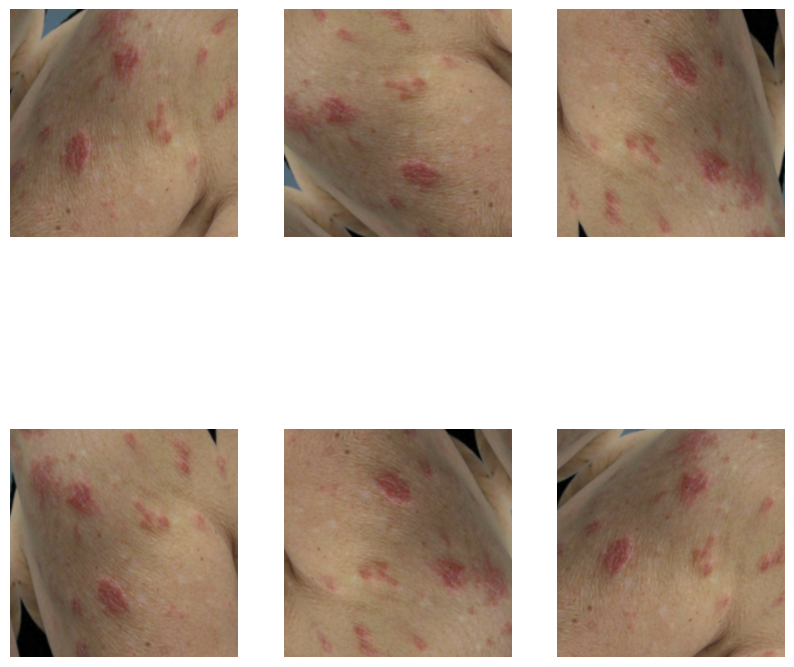

In [9]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])
plt.figure(figsize=(10,10))
for images, _ in train_df.take(1):
  for i in range(6):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(2,3,i+1)
    plt.imshow(augmented_images[0].numpy().astype('uint8'))
    plt.axis('off')

In [10]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights = True)
checkpoint_callback = ModelCheckpoint(
    filepath='/content/drive/MyDrive/DatasetForColab/SkinDisease/modelSave.h5',
    save_freq='epoch',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=False,
    verbose = 1
)

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
epochs = 100
history = model.fit(train_df, validation_data=val_df, epochs = epochs, callbacks= [early_stopping, checkpoint_callback])

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6448 - loss: 11.2577
Epoch 1: saving model to /content/drive/MyDrive/DatasetForColab/SkinDisease/modelSave.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 26s 6s/step - accuracy: 0.6286 - loss: 10.7204 - val_accuracy: 0.4444 - val_loss: 2.6955
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4759 - loss: 2.2544
Epoch 2: saving model to /content/drive/MyDrive/DatasetForColab/SkinDisease/modelSave.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step - accuracy: 0.4844 - loss: 2.2837 - val_accuracy: 0.4444 - val_loss: 1.8690
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4899 - loss: 1.4371
Epoch 3: saving model to /content/drive/MyDrive/DatasetForColab/SkinDisease/modelSave.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.4974 - loss: 1.4253 - val_accuracy: 0.4815 - val_loss: 0.9801
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5152 - loss: 0.8790
Epoch 4: saving model to /content/drive/MyDrive/DatasetForColab/SkinDisease/modelSave.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 34s 9s/step - accuracy: 0.5286 - loss: 0.8615 - val_accuracy: 0.5556 - val_loss: 0.6700
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6877 - loss: 0.5939
Epoch 5: saving model to /content/drive/MyDrive/DatasetForColab/SkinDisease/modelSave.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 88s 12s/step - accuracy: 0.6775 - loss: 0.6047 - val_accuracy: 0.5556 - val_loss: 1.0130
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6142 - loss: 0.8052
Epoch 6: saving model to /content/drive/MyDrive/DatasetForColab/SkinDisease/modelSave.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 78s 24s/step - accuracy: 0.6150 - loss: 0.7958 - val_accuracy: 0.5926 - val_loss: 0.7738
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5768 - loss: 0.7603
Epoch 7: saving model to /content/drive/MyDrive/DatasetForColab/SkinDisease/modelSave.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 79s 9s/step - accuracy: 0.5760 - loss: 0.7689 - val_accuracy: 0.5926 - val_loss: 0.6025
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5986 - loss: 0.6964
Epoch 8: saving model to /content/drive/MyDrive/DatasetForColab/SkinDisease/modelSave.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 62s 20s/step - accuracy: 0.5952 - loss: 0.7062 - val_accuracy: 0.7407 - val_loss: 0.4822
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6451 - loss: 0.7068
Epoch 9: saving model to /content/drive/MyDrive/DatasetForColab/SkinDisease/modelSave.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 74s 23s/step - accuracy: 0.6415 - loss: 0.7147 - val_accuracy: 0.7407 - val_loss: 0.4776
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6741 - loss: 0.6274
Epoch 10: saving model to /content/drive/MyDrive/DatasetForColab/SkinDisease/modelSave.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 102s 18s/step - accuracy: 0.6629 - loss: 0.6355 - val_accuracy: 0.7407 - val_loss: 0.4819
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6695 - loss: 0.5800
Epoch 11: saving model to /content/drive/MyDrive/DatasetForColab/SkinDisease/modelSave.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 62s 20s/step - accuracy: 0.6629 - loss: 0.5863 - val_accuracy: 0.6667 - val_loss: 0.5159
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6802 - loss: 0.5193
Epoch 12: saving model to /content/drive/MyDrive/DatasetForColab/SkinDisease/modelSave.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 86s 13s/step - accuracy: 0.6842 - loss: 0.5192 - val_accuracy: 0.7037 - val_loss: 0.4924
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7115 - loss: 0.5051
Epoch 13: saving model to /content/drive/MyDrive/DatasetForColab/SkinDisease/modelSave.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 76s 9s/step - accuracy: 0.7019 - loss: 0.5169 - val_accuracy: 0.7037 - val_loss: 0.4746
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7554 - loss: 0.5115
Epoch 14: saving model to /content/drive/MyDrive/DatasetForColab/SkinDisease/modelSave.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 77s 25s/step - accuracy: 0.7606 - loss: 0.5052 - val_accuracy: 0.8148 - val_loss: 0.5078
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7742 - loss: 0.4735
Epoch 15: saving model to /content/drive/MyDrive/DatasetForColab/SkinDisease/modelSave.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 86s 26s/step - accuracy: 0.7721 - loss: 0.4741 - val_accuracy: 0.7778 - val_loss: 0.5123
Epoch 16/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7599 - loss: 0.4441
Epoch 16: saving model to /content/drive/MyDrive/DatasetForColab/SkinDisease/modelSave.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 74s 23s/step - accuracy: 0.7607 - loss: 0.4437 - val_accuracy: 0.6296 - val_loss: 0.5703
Epoch 17/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7241 - loss: 0.5219
Epoch 17: saving model to /content/drive/MyDrive/DatasetForColab/SkinDisease/modelSave.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 91s 12s/step - accuracy: 0.7284 - loss: 0.5160 - val_accuracy: 0.7778 - val_loss: 0.5327
Epoch 18/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7723 - loss: 0.4382
Epoch 18: saving model to /content/drive/MyDrive/DatasetForColab/SkinDisease/modelSave.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 62s 19s/step - accuracy: 0.7742 - loss: 0.4367 - val_accuracy: 0.7778 - val_loss: 0.6003


In [15]:
load_model = keras.models.load_model('/content/drive/MyDrive/DatasetForColab/SkinDisease/modelSave.h5')

In [16]:
loss, accuracy = model.evaluate(val_df)
print('Test loss :', loss)
print('Test accuracy :', accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step - accuracy: 0.7037 - loss: 0.4746
Test loss : 0.4745676815509796
Test accuracy : 0.7037037014961243


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[ 9  6]
 [ 2 10]]


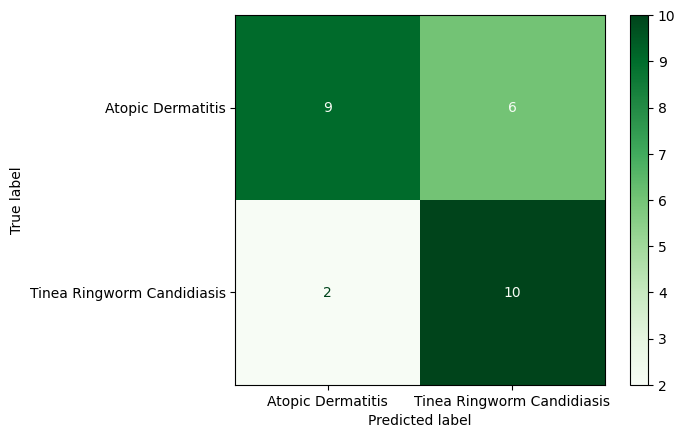

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

y_true = []
y_pred = []

for images, labels in val_df:
  predictions = model.predict(images)
  y_true.extend(labels.numpy())
  y_pred.extend([1 if p > 0.5 else 0 for p in predictions])

cm = confusion_matrix(y_true, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Atopic Dermatitis', 'Tinea Ringworm Candidiasis'])
disp.plot(cmap=plt.cm.Greens) ## 'viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Blues', 'Greens', 'Reds', 'Purples', 'Oranges', 'Greys', 'YlGnBu', 'YlOrRd', 'PuBuGn', 'coolwarm', 'seismic', 'bwr', 'PiYG', 'PRGn', 'RdBu', 'RdGy', 'twilight', 'twilight_shifted', 'hsv', 'tab10', 'tab20', 'Set1', 'Set2', 'Set3', 'Pastel1', 'Pastel2', 'Dark2', 'Accent'

plt.show()

# ***END***